In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from os.path import join
from matplotlib.colors import ListedColormap
from sklearn import neighbors , datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.linear_model import LogisticRegression

# 1. 데이터 보기

In [188]:
datapath = join('data','abalone.txt')
labelpath = join('data','abalone_attributes.txt')

#txt파일 읽기
columns = list()
with open(labelpath, 'r') as f:
    columns = f.read().split('\n')
    
# cloumns = attribute    
abalone = pd.read_csv(datapath, names = columns)

Y = abalone['Sex']
X = abalone
del X['Sex']
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


# 2. Train, Testset 분류

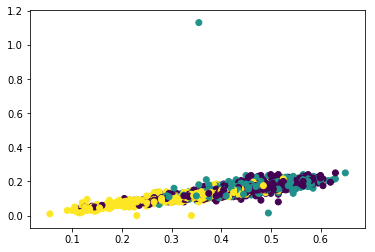

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)
c = []
for i in Y_train : 
    if i =='M' :
        c.append(0)
    elif i == 'F' :
        c.append(1)  
    else : 
        c.append(2)
        
plt.scatter(X_train.iloc[:,1] , X_train.iloc[:,2] , marker='o', c= c , )
plt.show()

## 3.정규화 

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #변수들의 척도(Scale)가 서로 다를 경우에 상호 비교를 위해서 표준화하는 방법
scaler.fit(X_train)
trnx_scale = scaler.transform(X_train)
tstx_scale = scaler.transform(X_test)

c:\users\s\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# 4. 모델에 적용

## 4.1 K-NN

### 4.1.1 Model

In [158]:
# k 값을 의미하는 변수
n_neighbors = 7
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(trnx_scale[:,0:2], Y_train)

print("uniform  학습 세트 정확도  : {:.3f}%".format(clf.score(trnx_scale[:,0:2], Y_train) * 100))
print("uniform  테스트 세트 정확도: {:.3f}%".format(clf.score(tstx_scale[:,0:2], Y_test) * 100))



uniform  학습 세트 정확도  : 63.052%
uniform  테스트 세트 정확도: 49.282%


### 4.2.2 시각화

In [159]:
#Mash를 그릴 때 간격을 결정하는 변수
h = .02

#cmap_light = Mash에 표시될 3가지 색상
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
#cmap_bold = 학습 데이터를 표시할 3가지 색상
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#그래프 범위 설정을 위한 변수
x_min, x_max = trnx_scale[:, 0].min() - .5, trnx_scale[:, 0].max() + .5
y_min, y_max = trnx_scale[:, 1].min() - .5, trnx_scale[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
print(np.c_[xx.ravel(), yy.ravel()].shape)
print(X.shape)
print(trnx_scale[:,0:2].shape)

(10000, 2)
(4177, 8)
(2923, 2)


## 4.2 Decision Tree

In [215]:
estimator = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 30,
                                   max_leaf_nodes = 10,
                                  )
estimator.fit(trnx_scale, Y_train)
      
print("uniform  학습 세트 정확도  : {:.3f}%".format(estimator.score(trnx_scale, Y_train) * 100))
print("uniform  테스트 세트 정확도: {:.3f}%".format(estimator.score(tstx_scale, Y_test) * 100))
print("특성 중요도:\n{}".format(estimator.feature_importances_))


uniform  학습 세트 정확도  : 57.954%
uniform  테스트 세트 정확도: 53.349%
특성 중요도:
[0.01526352 0.         0.0658503  0.68224521 0.0163175  0.02424886
 0.         0.19607461]


### 4.2.2 시각화

In [216]:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

#node_depth = 모든 분기의 깊이
#is_leaves = 해당 분기의 잎파리 노드 여부
#leaves_count = 잎파리 노드의 수

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
leaves_count = 0
#첫번째 분기의 ID는 -1이기 때문에 -1을 가진 stack 생성
stack = [(0, -1)]

#모든 분기를 순회하며 해당 분기의 깊이, 잎파리 여부를 파악
#전체 잎파리 노드의 수 조사
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        leaves_count += 1
        
print(np.max(node_depth))
print(leaves_count)
print(n_nodes)

5
10
19


In [217]:
#모든 분기의 정보를 출력
#tab을 활용하여 깊이를 확인할 수 있으며 각 분기가 어떤 변수의 어떤 값을 기준으로 이루어졌는지 확인할 수 있다.
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
        

node=0 test node: go to node 1 if X[:, 3] <= 0.307380735874176 else to node 2.
	node=1 test node: go to node 3 if X[:, 7] <= 0.2678571492433548 else to node 4.
	node=2 test node: go to node 7 if X[:, 5] <= 0.39203423261642456 else to node 8.
		node=3 test node: go to node 5 if X[:, 2] <= 0.09955752268433571 else to node 6.
		node=4 test node: go to node 11 if X[:, 7] <= 0.375 else to node 12.
			node=5 leaf node.
			node=6 test node: go to node 9 if X[:, 3] <= 0.22934293746948242 else to node 10.
		node=7 leaf node.
		node=8 test node: go to node 13 if X[:, 4] <= 0.5869199633598328 else to node 14.
				node=9 leaf node.
				node=10 leaf node.
			node=11 test node: go to node 15 if X[:, 0] <= 0.5979729890823364 else to node 16.
			node=12 leaf node.
			node=13 leaf node.
			node=14 leaf node.
				node=15 leaf node.
				node=16 test node: go to node 17 if X[:, 3] <= 0.2420342043042183 else to node 18.
					node=17 leaf node.
					node=18 leaf node.


In [221]:
export_graphviz(estimator, out_file='DT_tree.dot')

In [ ]:
## 트리 시각화하기
!.[title](Image/DT_classification.png)

## 3.3 Logistic Regreesion

In [164]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', max_iter = 1000)
logreg.fit(trnx_scale, Y_train)
print("학습 세트 정확도: {:.3f}%".format(logreg.score(trnx_scale, Y_train) * 100))
print("테스트 세트 정확도: {:.3f}%".format(logreg.score(tstx_scale, Y_test) * 100))


학습 세트 정확도: 56.380%
테스트 세트 정확도: 57.097%
